In [100]:
import scanpy as sc
import pandas as pd
import pandas as pd
from matplotlib import rcParams
from matplotlib import style
import matplotlib.pyplot as plt
import scirpy as ir
import anndata
sc.settings.verbosity = 3

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = 14,10
pd.set_option('display.max_columns', None) 
import anndata2ri
from matplotlib.pyplot import rc_context
import numpy as np


In [273]:


# Activate the anndata2ri conversion between SingleCellExperiment and AnnData
anndata2ri.activate()

#Loading the rpy2 extension enables cell magic to be used
#This runs R code in jupyter notebook cells
%load_ext rpy2.ipython


In [274]:
%%R
suppressPackageStartupMessages(library(Seurat))

obj <-readRDS('/home/matthew/Research/HL_PD1/tcrsubset.rds')
obj

An object of class Seurat 
32620 features across 4058 samples within 3 assays 
Active assay: RNA (16420 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap


In [279]:
%%R -o tcrsub
#convert the Seurat object to a SingleCellExperiment object
tcrsub <- as.SingleCellExperiment(obj)

tcrsub

class: SingleCellExperiment 
dim: 16420 4058 
metadata(0):
assays(2): X logcounts
rownames(16420): RP11-34P13.7 FO538757.3 ... NEU4 KCTD14
rowData names(0):
colnames(4058): Timepoint_1_AAAGATGAGTCCAGGA-1
  Timepoint_1_AAAGCAATCAGAGCTT-1 ... Timepoint_6_TTTGTCACAAGTTGTC-1
  Timepoint_6_TTTGTCACACATGGGA-1
colData names(30): orig.ident nCount_RNA ... new.ident.tcr ident
reducedDimNames(2): PCA UMAP
altExpNames(0):


In [333]:
# tcrsub

# tcrsub.write('tcrsub.h5ad')
pbmc = sc.read_h5ad('pbmc.h5ad')
pbmc

AnnData object with n_obs × n_vars = 10601 × 16420
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Timepoint', 'Disease_status', 'Pembrolizumab', 'iRAE', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1', 'clonotype', 'tcell_barcode', 'OXIDATIVE_PHOSPHORYLATION1', 'GLYCOLYSIS1', 'MTOR1', 'PI3K_AKT_MTOR1', 'ident'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts'

In [334]:
pbmc.layers['untouched'] = pbmc.X
pbmc.X = pbmc.layers['logcounts']

# tcrsub.layers['untouched'] = tcrsub.X
# tcrsub.X = tcrsub.layers['logcounts']

# tcrsub.layers['scaled'] = sc.pp.scale(tcrsub, copy=True).X


In [332]:
sc.pl.umap(pbmc,color='new.ident')

AttributeError: 'RS4' object has no attribute '_sanitize'

In [7]:
# plot for each timepoint
t1 = pbmc[pbmc.obs['Timepoint'].isin(['1'])]
t2 = pbmc[pbmc.obs['Timepoint'].isin(['2'])]
t3 = pbmc[pbmc.obs['Timepoint'].isin(['3'])]
t4 = pbmc[pbmc.obs['Timepoint'].isin(['4'])]
t5 = pbmc[pbmc.obs['Timepoint'].isin(['5'])]
t6 = pbmc[pbmc.obs['Timepoint'].isin(['6'])]



/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


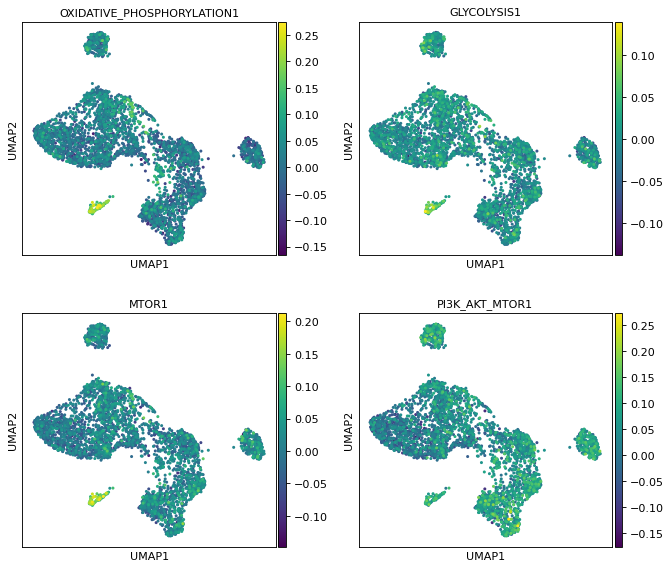

In [292]:
sc.pl.umap(tcrsub, color=['OXIDATIVE_PHOSPHORYLATION1','GLYCOLYSIS1','MTOR1','PI3K_AKT_MTOR1'],ncols=2)

In [322]:
# pbmc.layers['logcounts']
# pbmc

cdtex1 = tcrsub[tcrsub.obs['new.ident.tcr'].isin(['CD8 TEX-1'])]
cdteff2 = tcrsub[tcrsub.obs['new.ident.tcr'].isin(['CD8 TEFF-2'])]
cdteff3 = tcrsub[tcrsub.obs['seurat_clusters'].isin(['3'])]
cdteff3


View of AnnData object with n_obs × n_vars = 460 × 16420
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Timepoint', 'Disease_status', 'Pembrolizumab', 'iRAE', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1', 'clonotype', 'tcell_barcode', 'celltype.cond', 'OXIDATIVE_PHOSPHORYLATION1', 'GLYCOLYSIS1', 'MTOR1', 'PI3K_AKT_MTOR1', 'FATTY_ACID_METABOLISM1', 'new.ident.tcr', 'ident'
    uns: 'dendrogram_new.ident', 'dendrogram_new.ident_Timepoint', 'new.ident_colors', 'dendrogram_new.ident.tcr', 'dendrogram_new.ident.tcr_Timepoint', 'new.ident.tcr_colors', 'dendrogram_Disease_status', 'dendrogram_Timepoint'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts', 'untouched', 'scaled'

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Timepoint_new.ident.tcr']`


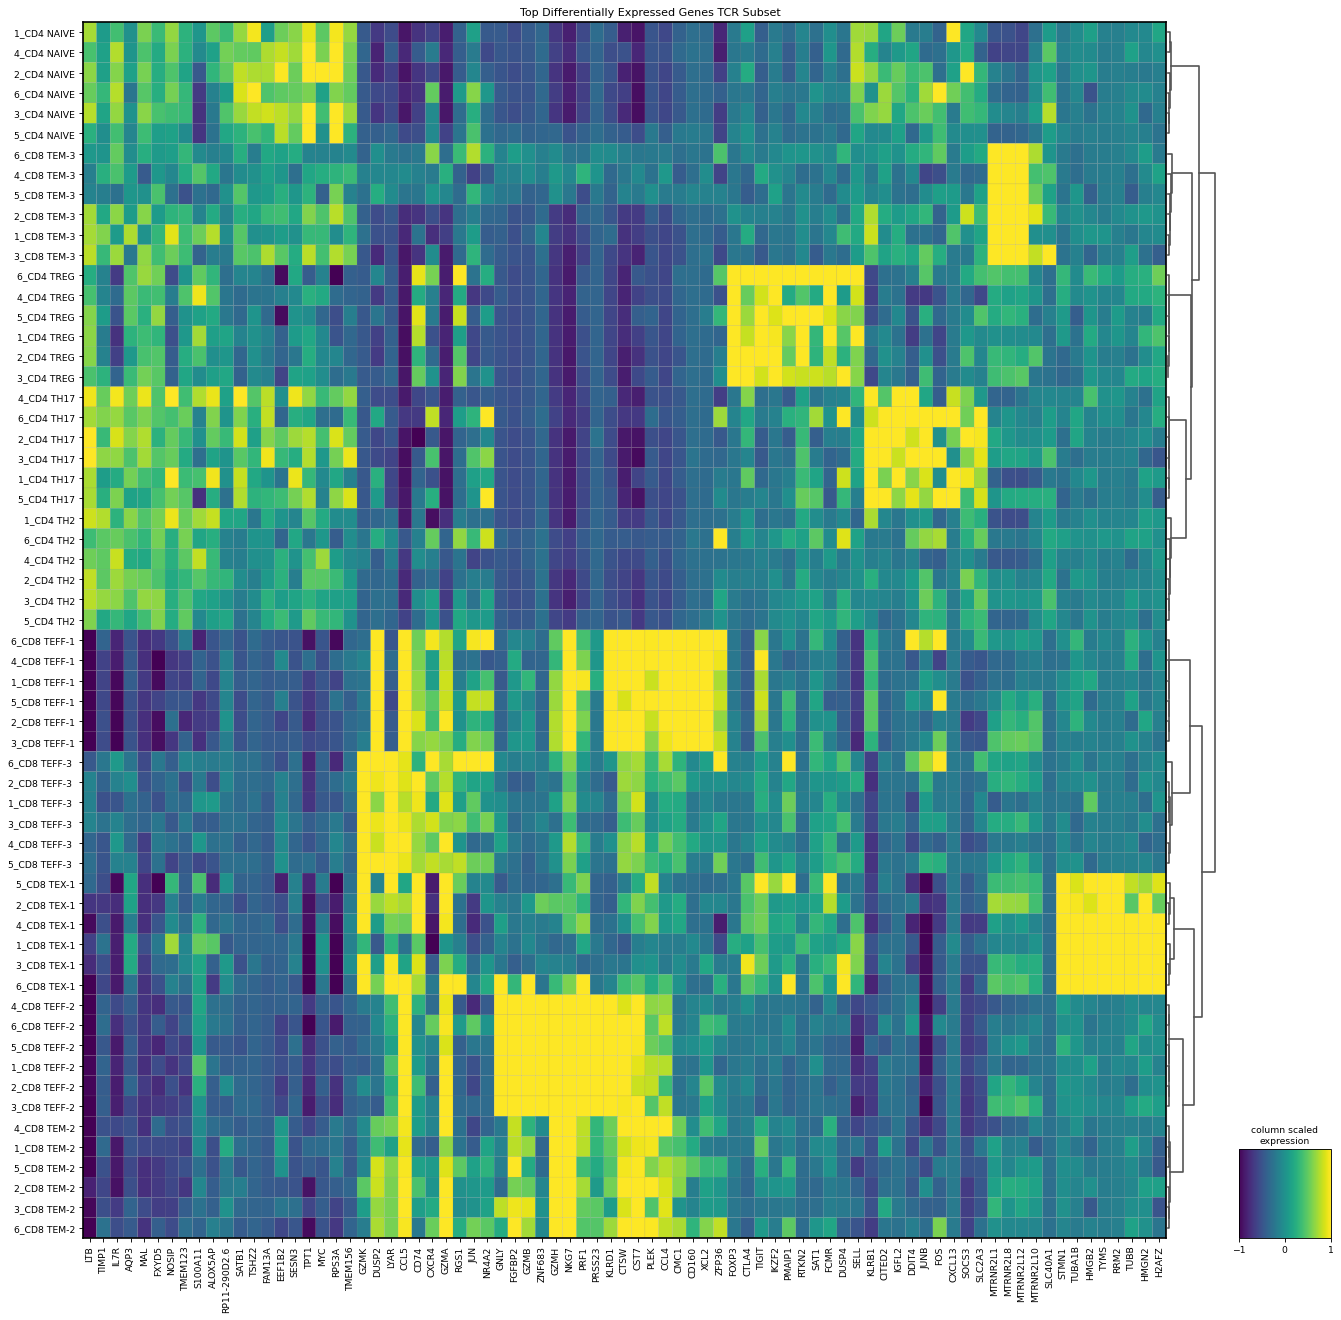

In [329]:







marker_genes_dict = {
    'Cytotoxic': ["GZMA","GZMH","GZMB","GZMK","PRF1","GNLY","KLRG1","KLRD1","IFNG"],
    'Active': ["CD27","CD28","CD69","FOS","JUN"],
    'Naive': ['CCR7','IL7R','SELL'],
    'Memory': ['CCR7','IL7R','SELL','CD27','CD28'],
    'Exhausted': ["PDCD1","EOMES","TIGIT","CD244","LAG3","CTLA4",'HAVCR2','TBX21']
}

topgenestcr = ['LTB','TIMP1','IL7R','AQP3','MAL','FXYD5','NOSIP','TMEM123','S100A11','ALOX5AP','RP11-290D2.6','SATB1','TSHZ2','FAM13A','EEF1B2','SESN3','TPT1','MYC','RPS3A','TMEM156','GZMK','DUSP2','LYAR','CCL5','CD74','CXCR4','GZMA','RGS1','JUN','NR4A2','GNLY','FGFBP2','GZMB','ZNF683','GZMH','NKG7','PRF1','PRSS23','KLRD1','CTSW','CST7','PLEK','CCL4','CMC1','CD160','XCL2','ZFP36','FOXP3','CTLA4','TIGIT','IKZF2','PMAIP1','RTKN2','SAT1','FCMR','DUSP4','SELL','KLRB1','CITED2','IGFL2','DDIT4','JUNB','FOS','CXCL13','SOCS3','SLC2A3','MTRNR2L1','MTRNR2L8','MTRNR2L12','MTRNR2L10','SLC40A1','STMN1','TUBA1B','HMGB2','TYMS','RRM2','TUBB','HMGN2','H2AFZ']

topgenes = ['LTB','IL7R','TIMP1','MAL','FXYD5','AQP3','GATA3','NOSIP','CRIP2','NPDC1','GNLY','ZNF683','GZMB','FGFBP2','TRBV9','GZMH','NKG7','PRF1','PRSS23','KLRD1','GZMA','CST7','CTSW','CCL4','EEF1B2','TSHZ2','TPT1','RPS3A','RPS8','EIF3E','RPS5','SELL','SESN3','RPL22','GZMK','DUSP2','CD74','LYAR','RGS1','CCL5','CXCR4','NELL2','HLA-DRA','CD27','KLRB1','CITED2','IGFL2','SATB1','JUNB','CXCL13','DDIT4','FAM13A','PELI1','MTRNR2L8','MTRNR2L12','MTRNR2L1','MTRNR2L10','HIST1H1E','CMC1','CD160','XCL2','ZFP36','FOXP3','CTLA4','RTKN2','IKZF2','DUSP4','PMAIP1','HPGD','FCMR','TIGIT','RP11-290D2.6','MYC','SOCS3','RP11-124N14.3','MT-ND6','USP10','TYROBP','FCGR3A','TRDC','SPON2','KLRF1','CD247','SH2D1B','STMN1','TUBA1B','HMGB2','HMGN2','TYMS','RRM2','TUBB','H2AFZ','GAPDH','ACTG1','KLRC1','FOS','CBLB','NR4A2','DNAJB1','IFI6','ISG15','IFI44L','MX1','STAT1','ISG20','EIF2AK2','IFIT3','IFI44','LY6E','S100A8','S100A9','LYZ','S100A12','CST3','VCAN','FCER1G','FCN1','AIF1']





# sc.set_figure_params(dpi_save=300,fontsize=10)

# sc.pl.matrixplot(tcrsub, marker_genes_dict, groupby=['Timepoint'], dendrogram=False, 
#                  cmap='viridis', standard_scale='var',title="T Cells TCR Subset Average Expression",
#                  colorbar_title='column scaled\nexpression',layer="untouched",swap_axes=False,
#                save="topgenes_tcr.png")

sc.pl.matrixplot(tcrsub, topgenestcr, groupby=['Timepoint','new.ident.tcr'], dendrogram=True, 
                 cmap='viridis',title="Top Differentially Expressed Genes TCR Subset",
                 colorbar_title='column scaled\nexpression',layer="scaled",swap_axes=False,
              figsize=(20,20), vmin=-1, vmax=1,save="topgenes_tcr_timepoint.png")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Disease_status']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_Timepoint']`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_new.ident']`


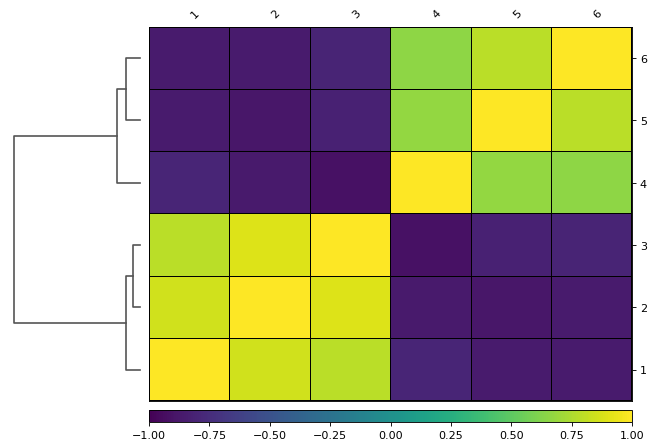

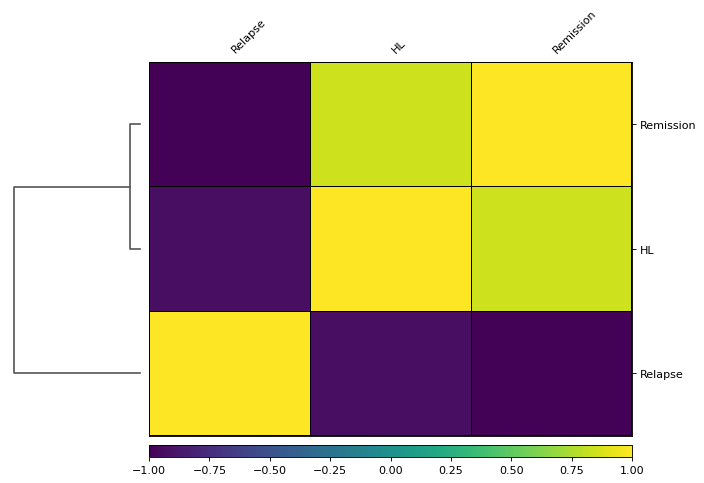

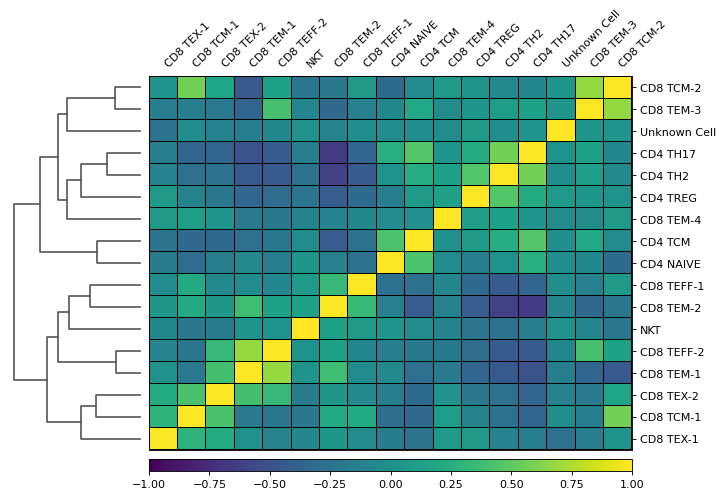

In [336]:
sc.tl.dendrogram(pbmc, groupby='Disease_status',cor_method="pearson")
sc.tl.dendrogram(pbmc, groupby='Timepoint',cor_method="pearson")
sc.tl.dendrogram(pbmc, groupby='new.ident',cor_method="pearson")



sc.pl.correlation_matrix(pbmc, 'Timepoint', figsize=(10,6.5),cmap='viridis',save="pbmc_tp_cor.png")
sc.pl.correlation_matrix(pbmc, 'Disease_status', figsize=(10,6.5),cmap='viridis',save="pbmc_ds_cor.png")
sc.pl.correlation_matrix(pbmc, 'new.ident', figsize=(10,6.5),cmap='viridis',save="pbmc_ident_cor.png")

In [291]:

tcrsub

AnnData object with n_obs × n_vars = 4058 × 16420
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Timepoint', 'Disease_status', 'Pembrolizumab', 'iRAE', 'log10GenesPerUMI', 'percent_mito', 'percent_ribo', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'new.ident', 'integrated_snn_res.1', 'clonotype', 'tcell_barcode', 'celltype.cond', 'OXIDATIVE_PHOSPHORYLATION1', 'GLYCOLYSIS1', 'MTOR1', 'PI3K_AKT_MTOR1', 'FATTY_ACID_METABOLISM1', 'new.ident.tcr', 'ident'
    uns: 'dendrogram_new.ident', 'dendrogram_new.ident_Timepoint', 'new.ident_colors', 'dendrogram_new.ident.tcr', 'dendrogram_new.ident.tcr_Timepoint', 'new.ident.tcr_colors', 'dendrogram_Disease_status', 'dendrogram_Timepoint'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts', 'untouched'

In [130]:
sc.tl.pca(pbmc1, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:23)


In [131]:
sc.pp.neighbors(pbmc1, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(pbmc1)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:21)


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


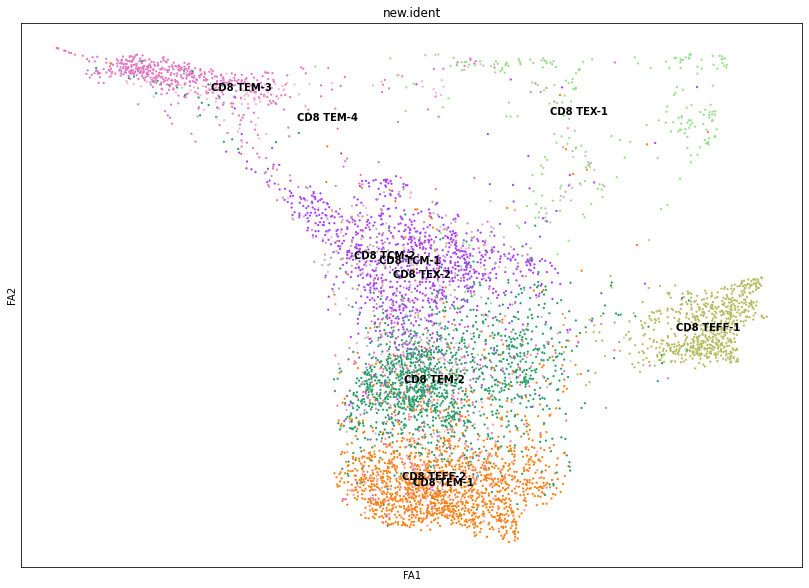

In [132]:
sc.pl.draw_graph(pbmc1, color='new.ident', legend_loc='on data')

In [133]:
sc.tl.diffmap(pbmc1)
sc.pp.neighbors(pbmc1, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99480605 0.993101   0.9878276  0.98435634 0.98333204
     0.980847   0.9737687  0.9707228  0.96884173 0.96740496 0.965384
     0.9634889  0.9629022  0.9606848 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:19)
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


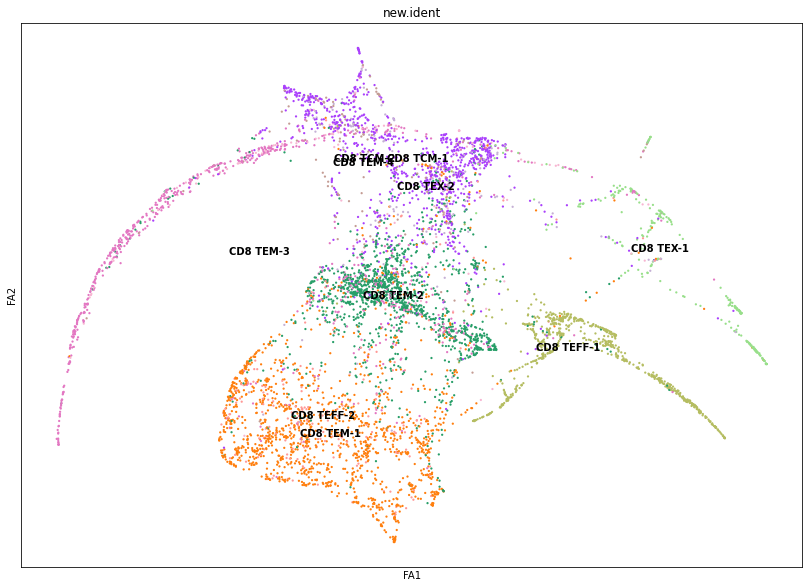

In [134]:
sc.tl.draw_graph(pbmc1)

sc.pl.draw_graph(pbmc1, color='new.ident', legend_loc='on data')

In [136]:
sc.tl.louvain(pbmc1, resolution=0.5)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [137]:
sc.tl.paga(pbmc1, groups='louvain')


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata

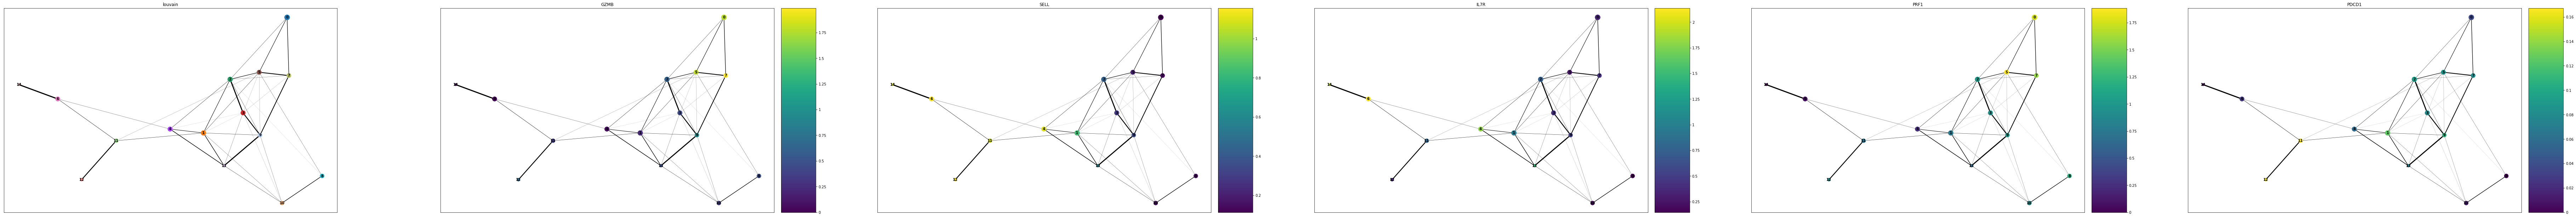

In [138]:
sc.pl.paga(pbmc1, color=['louvain','GZMB','SELL','IL7R','PRF1','PDCD1'])

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata

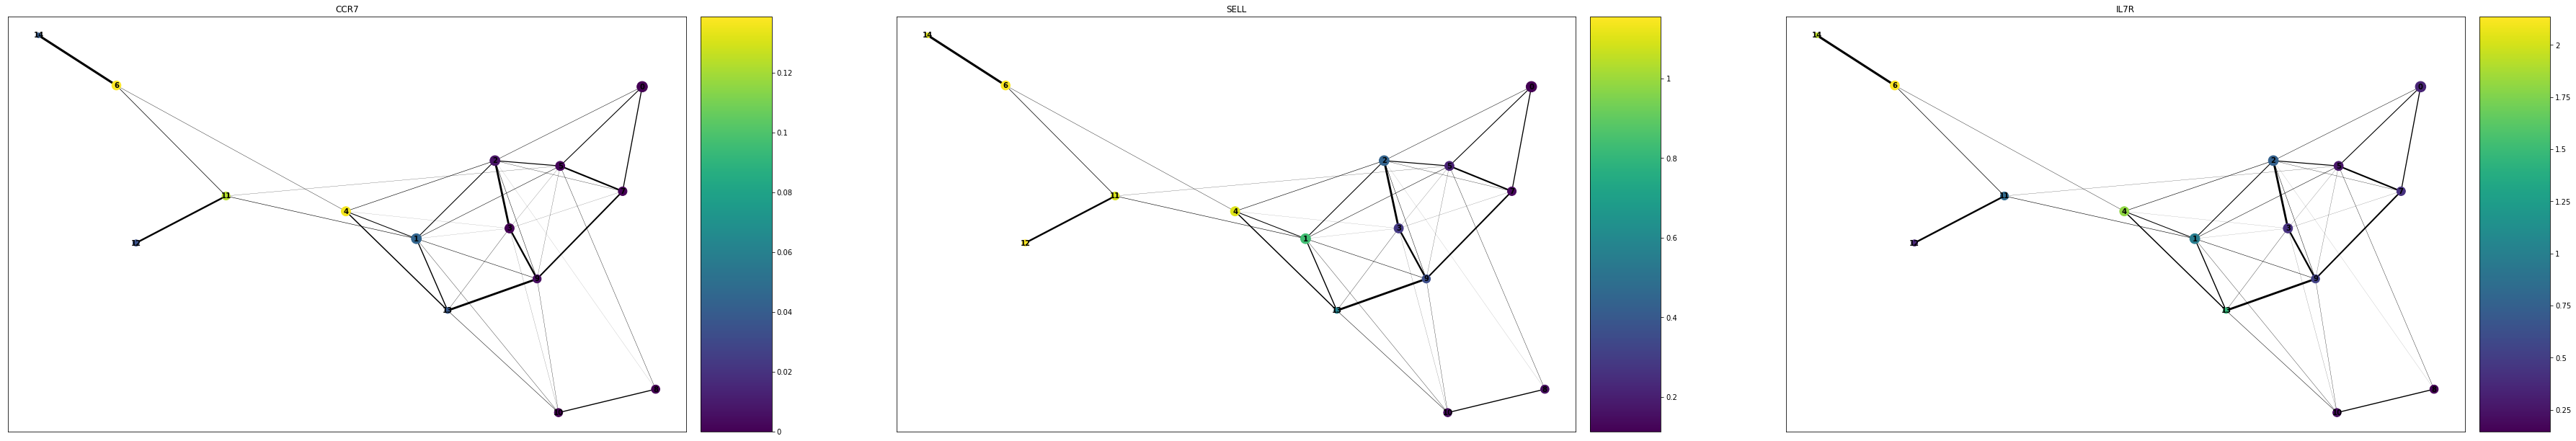

In [144]:
sc.pl.paga(pbmc1, color=['CCR7','SELL','IL7R'])

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata

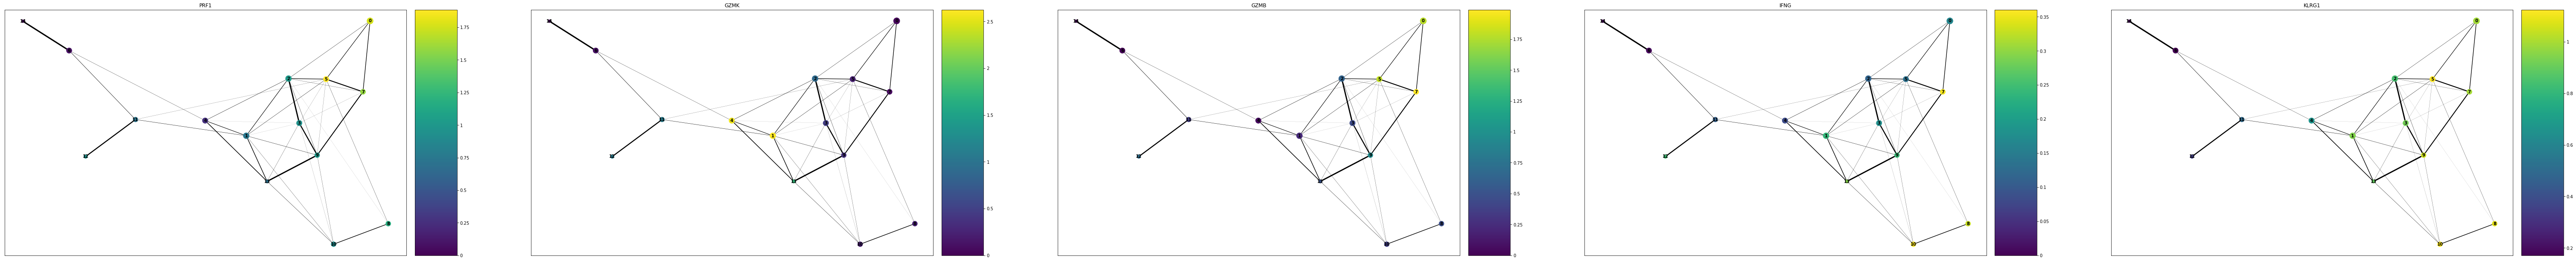

In [140]:
sc.pl.paga(pbmc1, color=['PRF1', 'GZMK', 'GZMB', 'IFNG','KLRG1'])

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/matthew/.local/lib/python3.6/site-packages/anndata

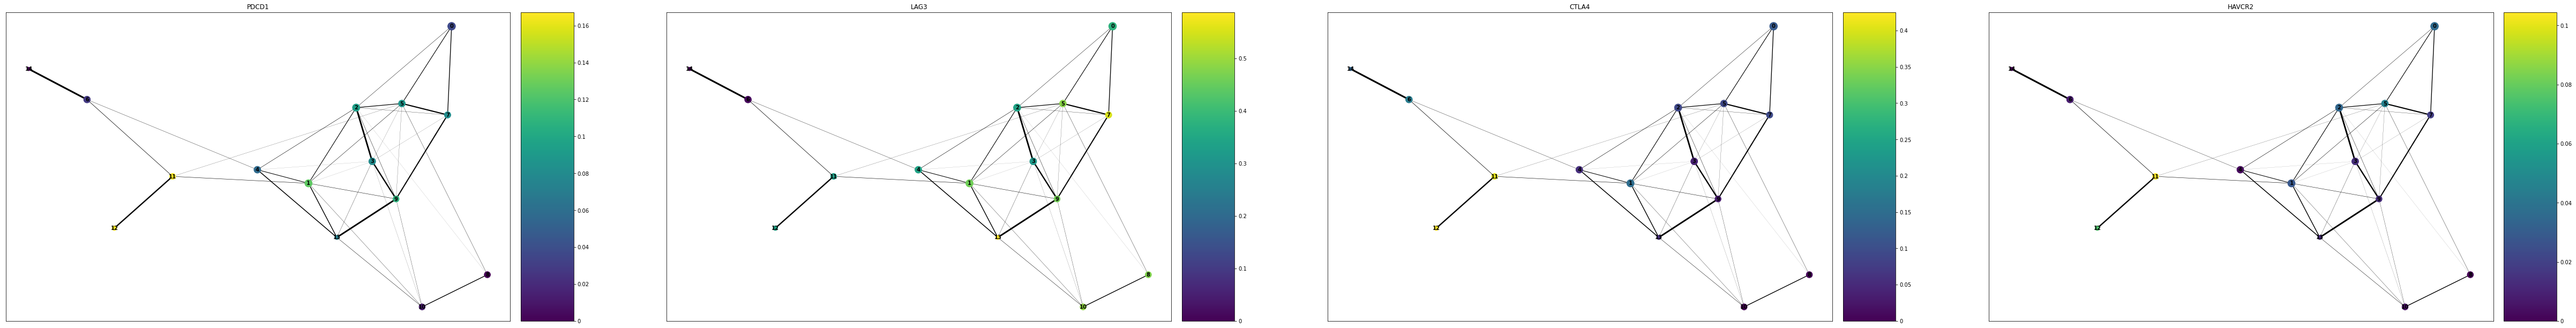

In [141]:
sc.pl.paga(pbmc1, color=['PDCD1', 'LAG3', 'CTLA4', 'HAVCR2'])

In [142]:
pbmc1.obs['louvain'].cat.categories
pbmc1.obs['louvain_anno'] = pbmc1.obs['louvain']

In [143]:
pbmc1.obs['louvain'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'],
      dtype='object')

In [146]:
pbmc1.obs['louvain_anno'].cat.categories = ['0/CD8', '1/CD8', '2/CD8', '3/CD8', '4/CD8', '5/CD8', '6/CD8 NAIVE', '7/CD8', '8/CD8', '9/CD8', '10/CD8', '11/CD8 TEX', '12/CD8 TEX',
       '13/CD8', '14/CD8']

/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


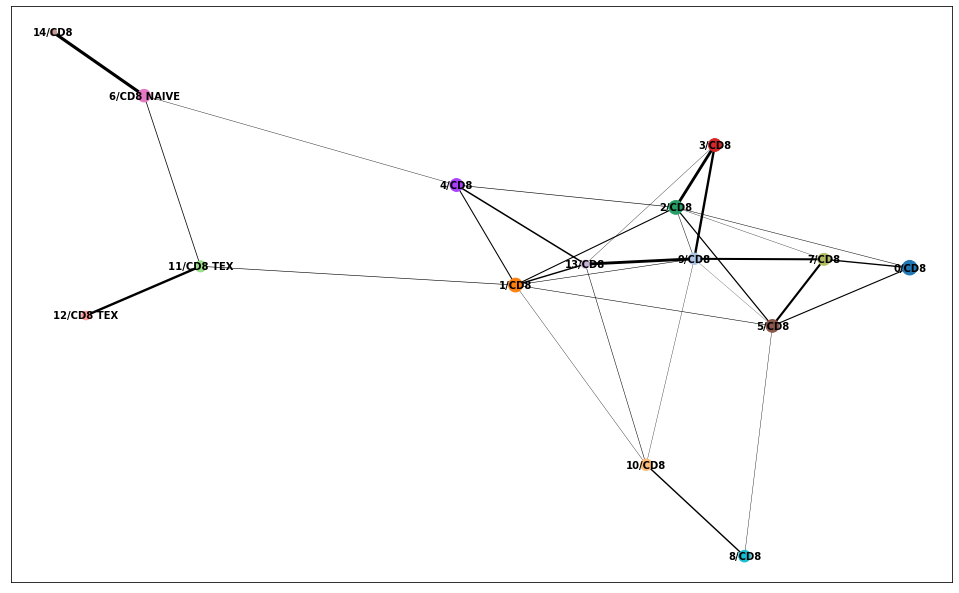

In [147]:
sc.tl.paga(pbmc1, groups='louvain_anno')
sc.pl.paga(pbmc1, threshold=0.03, show=False)





drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:19)
/home/matthew/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


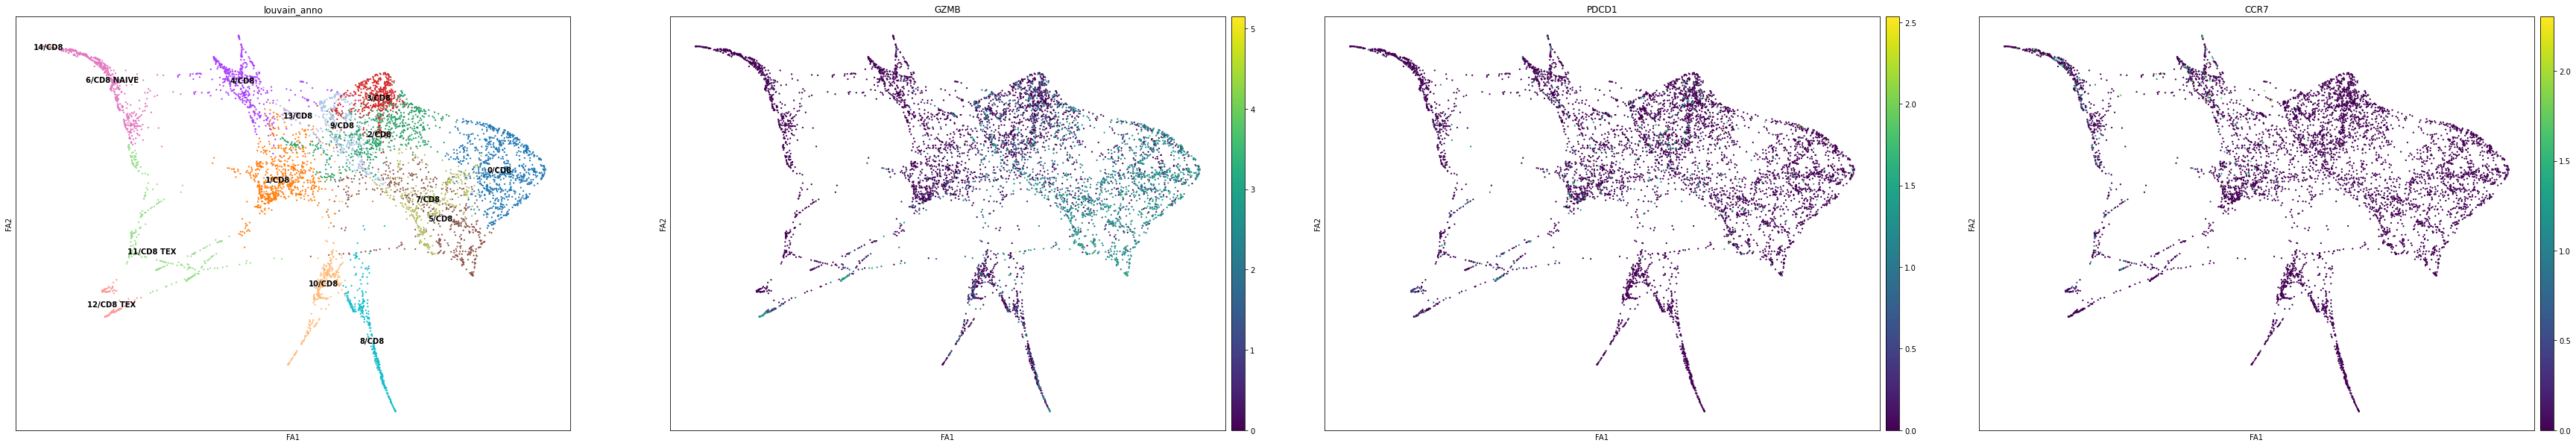

In [148]:
sc.tl.draw_graph(pbmc1, init_pos='paga')

sc.pl.draw_graph(pbmc1, color=['louvain_anno', 'GZMB','PDCD1','CCR7'], legend_loc='on data')


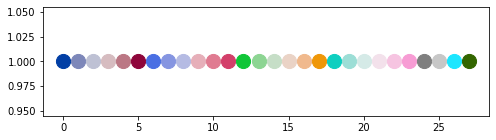

In [98]:
plt.figure(figsize=(8, 2))
for i in range(28):
    plt.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
plt.show()

In [101]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(pbmc1.uns['louvain_anno_colors'])

In [102]:
new_colors[[13]] = zeileis_colors[[12]]  # cd4 th17 / green
new_colors[[0,1,2,4,9,10,14,15,17,22]] = zeileis_colors[[5, 5, 5, 5, 11, 11, 10, 9, 21, 21]]  # CD8 / red
new_colors[[3,5,7,8,11,12,18,19,23]] = zeileis_colors[[17,17,17,15,15,16,16,16,16]]  # CD4/ yellow
new_colors[[6]] = zeileis_colors[[23]]  # cd4 naive /pink
new_colors[[21]] = zeileis_colors[[18]]  # cd8 ex / turquoise
new_colors[[16]] = zeileis_colors[[6]]  # NKT / light blue
new_colors[[7]] = zeileis_colors[[27]]  # CD4 TH2 / dark green
new_colors[[20, 24]] = zeileis_colors[[25, 25]]  # outliers / grey

In [103]:
pbmc1.uns['louvain_anno_colors'] = new_colors


--> added 'pos', the PAGA positions (adata.uns['paga'])


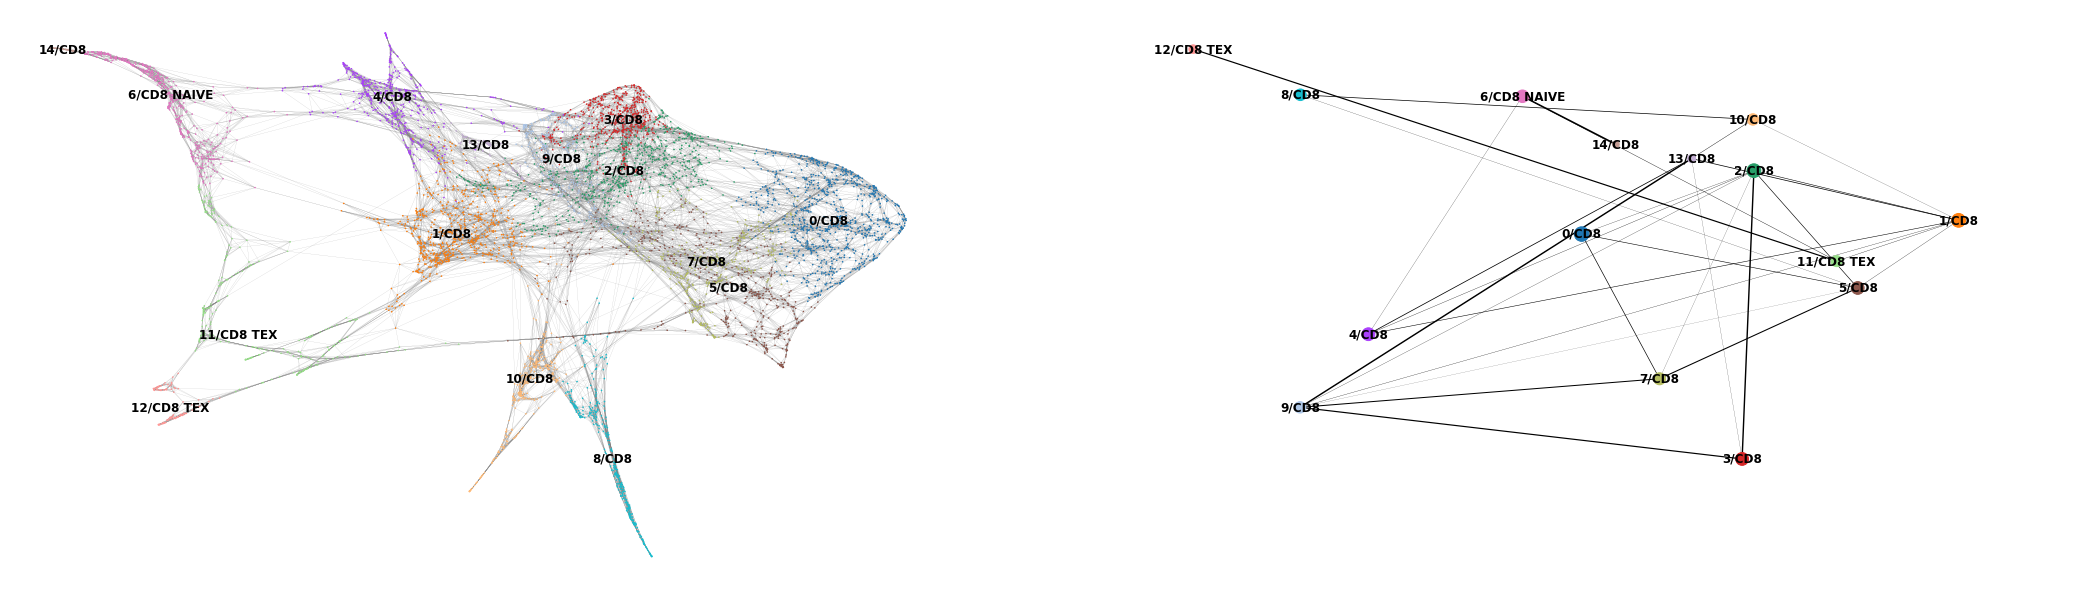

In [149]:
sc.pl.paga_compare(
    pbmc1, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True)

In [160]:
pbmc1.uns['iroot'] = np.flatnonzero(pbmc1.obs['louvain_anno']  == '14/CD8')[0]

In [161]:
sc.tl.dpt(pbmc1)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [152]:
adata_raw = pbmc1
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
pbmc1.raw = adata_raw



... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


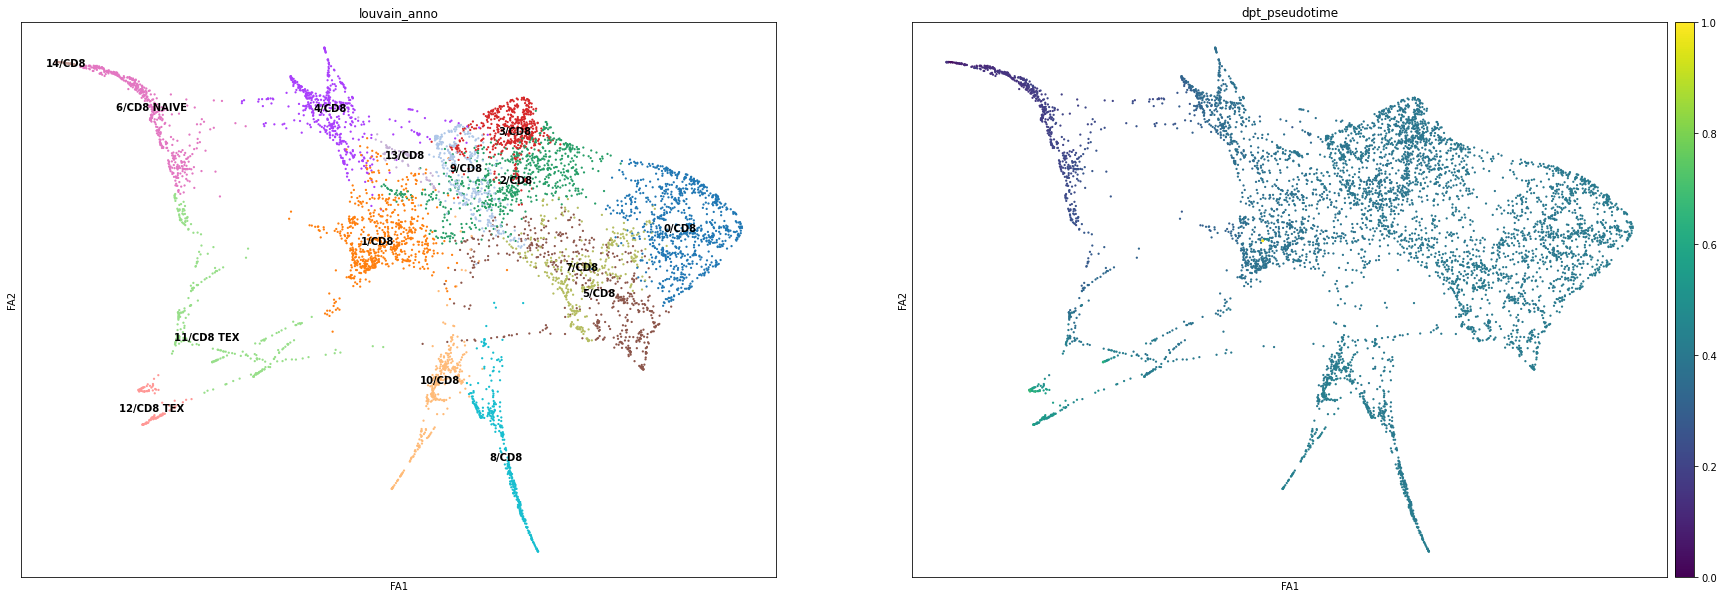

In [162]:
sc.pl.draw_graph(pbmc1, color=['louvain_anno', 'dpt_pseudotime'], legend_loc='on data')

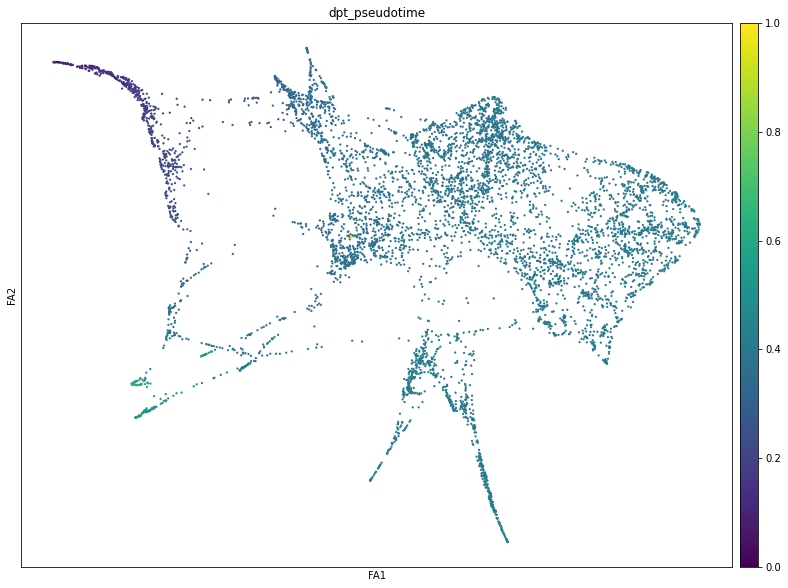

In [163]:
sc.pl.draw_graph(pbmc1, color=['dpt_pseudotime'], legend_loc='on data')